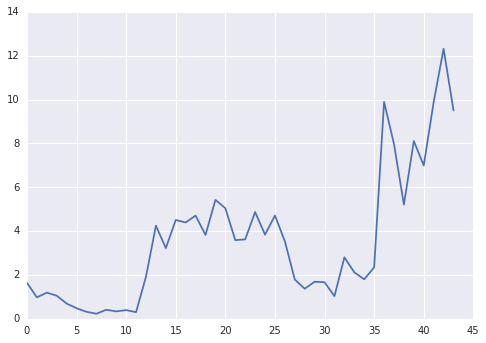

In [117]:
#Dataset read/plot
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('test.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [52]:
# other required packages
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [53]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [118]:
# load the dataset
dataframe = pandas.read_csv('test.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [70]:

dataset2 = pandas.read_csv('val.csv')
dataset2 = dataset2.astype('float32')
#testX.as_matrix()

In [122]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(30, 14)


In [72]:
# split into train and test sets
train_size = int(len(dataset) * 1)
test_size =  int(len(dataset2) * 1)
train, test = dataset, dataset2.as_matrix()
print(len(train), len(test))

(44, 23)


In [67]:
test_size

15

In [73]:
test

array([[ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 67.],
       [ 68.]], dtype=float32)

In [123]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [124]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [125]:
# create and fit MLP model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 13.6293
Epoch 2/200
0s - loss: 12.1967
Epoch 3/200
0s - loss: 10.8786
Epoch 4/200
0s - loss: 9.6673
Epoch 5/200
0s - loss: 8.5112
Epoch 6/200
0s - loss: 7.4705
Epoch 7/200
0s - loss: 6.5505
Epoch 8/200
0s - loss: 5.8280
Epoch 9/200
0s - loss: 4.9822
Epoch 10/200
0s - loss: 4.3550
Epoch 11/200
0s - loss: 3.7502
Epoch 12/200
0s - loss: 3.3226
Epoch 13/200
0s - loss: 2.8421
Epoch 14/200
0s - loss: 2.4669
Epoch 15/200
0s - loss: 2.1607
Epoch 16/200
0s - loss: 1.8968
Epoch 17/200
0s - loss: 1.6829
Epoch 18/200
0s - loss: 1.5136
Epoch 19/200
0s - loss: 1.3811
Epoch 20/200
0s - loss: 1.2534
Epoch 21/200
0s - loss: 1.1653
Epoch 22/200
0s - loss: 1.1106
Epoch 23/200
0s - loss: 1.0410
Epoch 24/200
0s - loss: 1.0037
Epoch 25/200
0s - loss: 0.9757
Epoch 26/200
0s - loss: 0.9495
Epoch 27/200
0s - loss: 0.9361
Epoch 28/200
0s - loss: 0.9221
Epoch 29/200
0s - loss: 0.9104
Epoch 30/200
0s - loss: 0.9032
Epoch 31/200
0s - loss: 0.8987
Epoch 32/200
0s - loss: 0.8949
Epoch 33/200
0

In [127]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.83 MSE (0.91 RMSE)
Test Score: 8.53 MSE (2.92 RMSE)


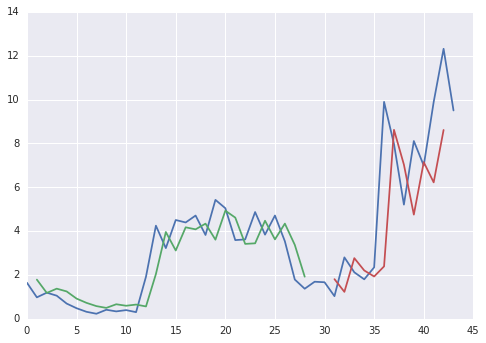

In [128]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
testPredict

array([[ 2.02349257],
       [ 1.40486813],
       [ 1.60327172],
       [ 1.47522211],
       [ 1.14210165],
       [ 0.94218862],
       [ 0.784594  ],
       [ 0.6819486 ],
       [ 0.87407714],
       [ 0.80204469],
       [ 0.85896409],
       [ 0.76862603],
       [ 2.28164077],
       [ 4.44061756],
       [ 3.4902823 ]], dtype=float32)

In [50]:
testPredict

array([[ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186],
       [ 0.52239186]], dtype=float32)